# 동적 계획법 
## 정복 기법과 유사한 부분이 많음
## 부분문제들의답을저장,다시꺼내서사용
## 같은 부분 문제를 다시 풀지 않도록 하는 것이 핵심 
## 공간으로 시간을 버는 전략의 일종


### 7.1 피보나치수열과 동적 계획법
#### 피보나치 수열 (분할 정복)
#### 심각한 계산의 중복: O(2^n)
#### 동적 계획법
#### 어렵게 구한 답을 한 번만 쓰고 버리지 말고 저장 => 재사용
#### 구현 방법
#### 1 메모이제이션 하향식
#### 테이블화 : 상향식

## 1 메모라이제이션 하향식
#### 결과를 저장할 메모리 공간 준비, 한번 계산된 값을 저장해 두었다가 재 활용
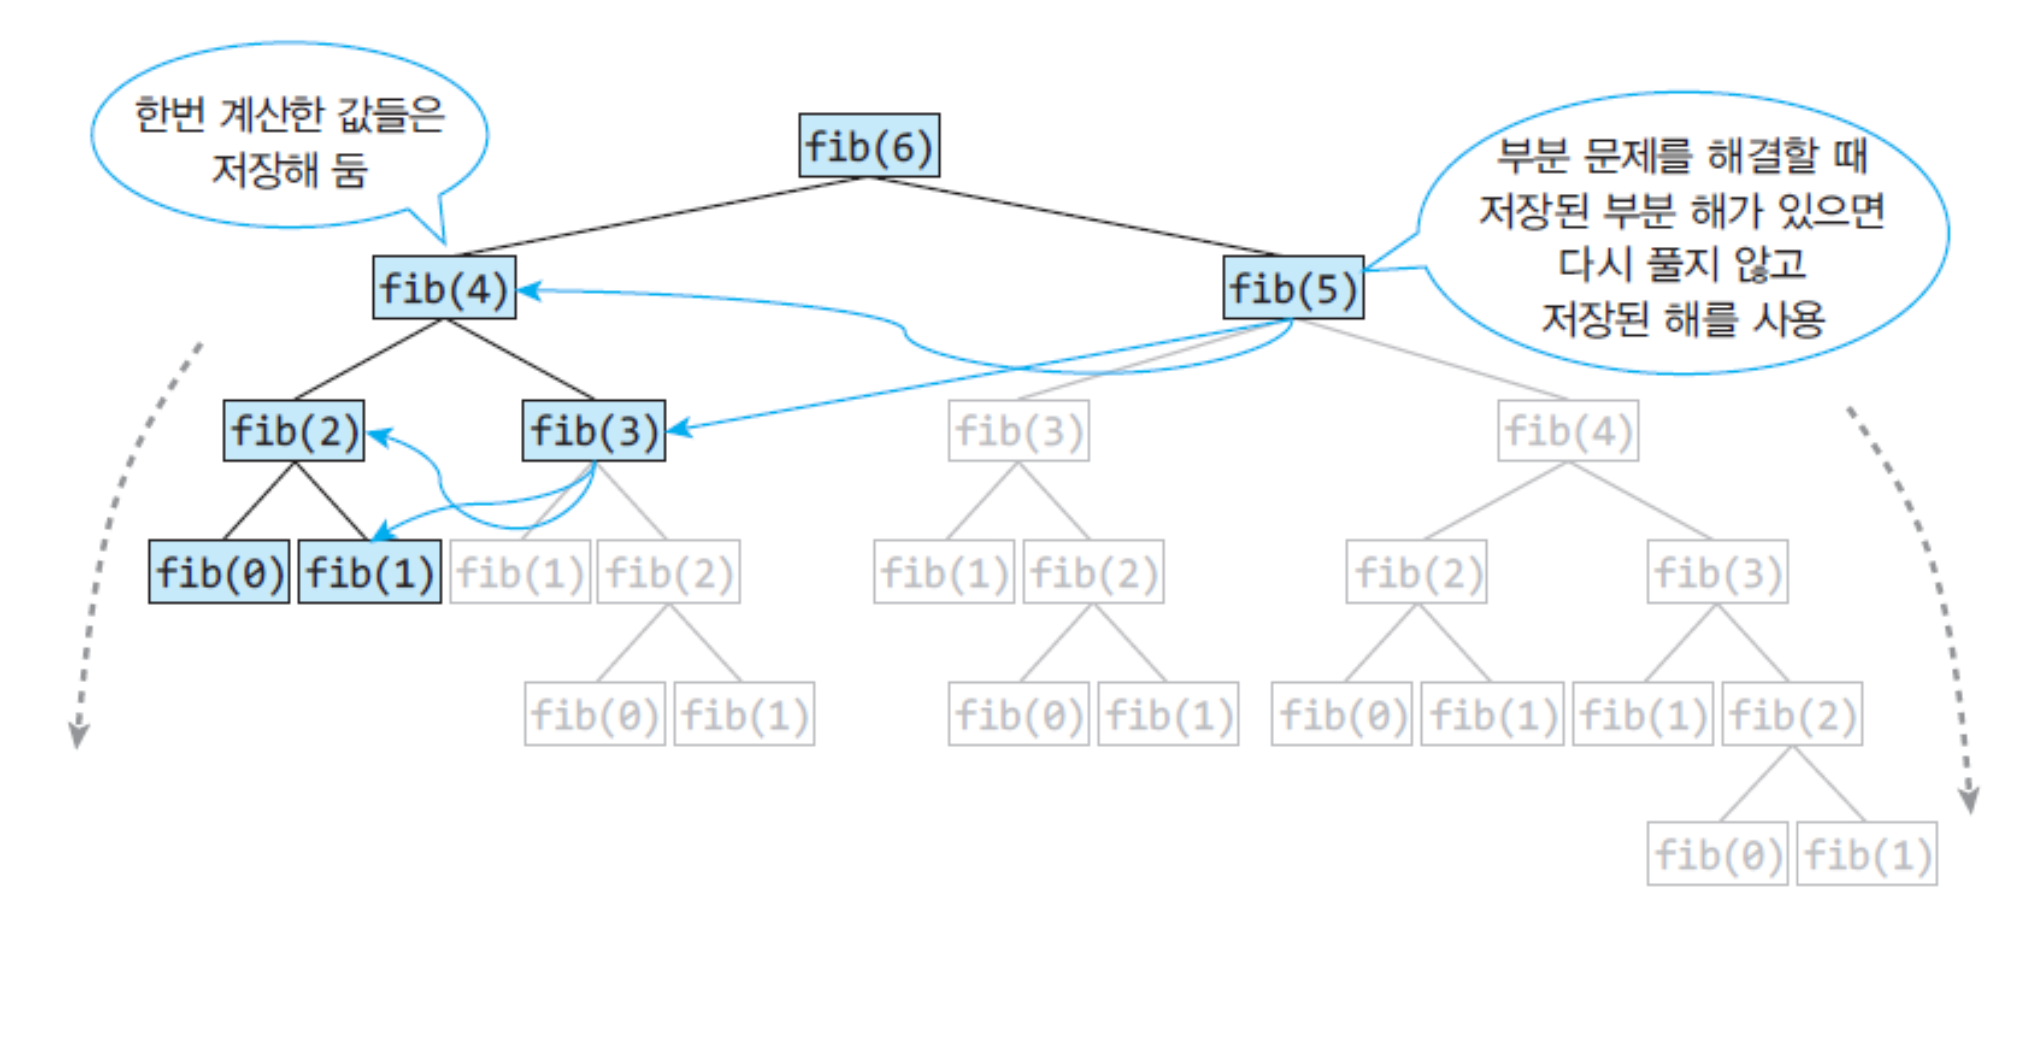

### 시간 복잡도 O(n)
### 공간 복잡도 O(n)


### 2. 테이블화 : 샹항식
#### 부분 문제의 해를 메모리에 순서적으로 저장 후 사용
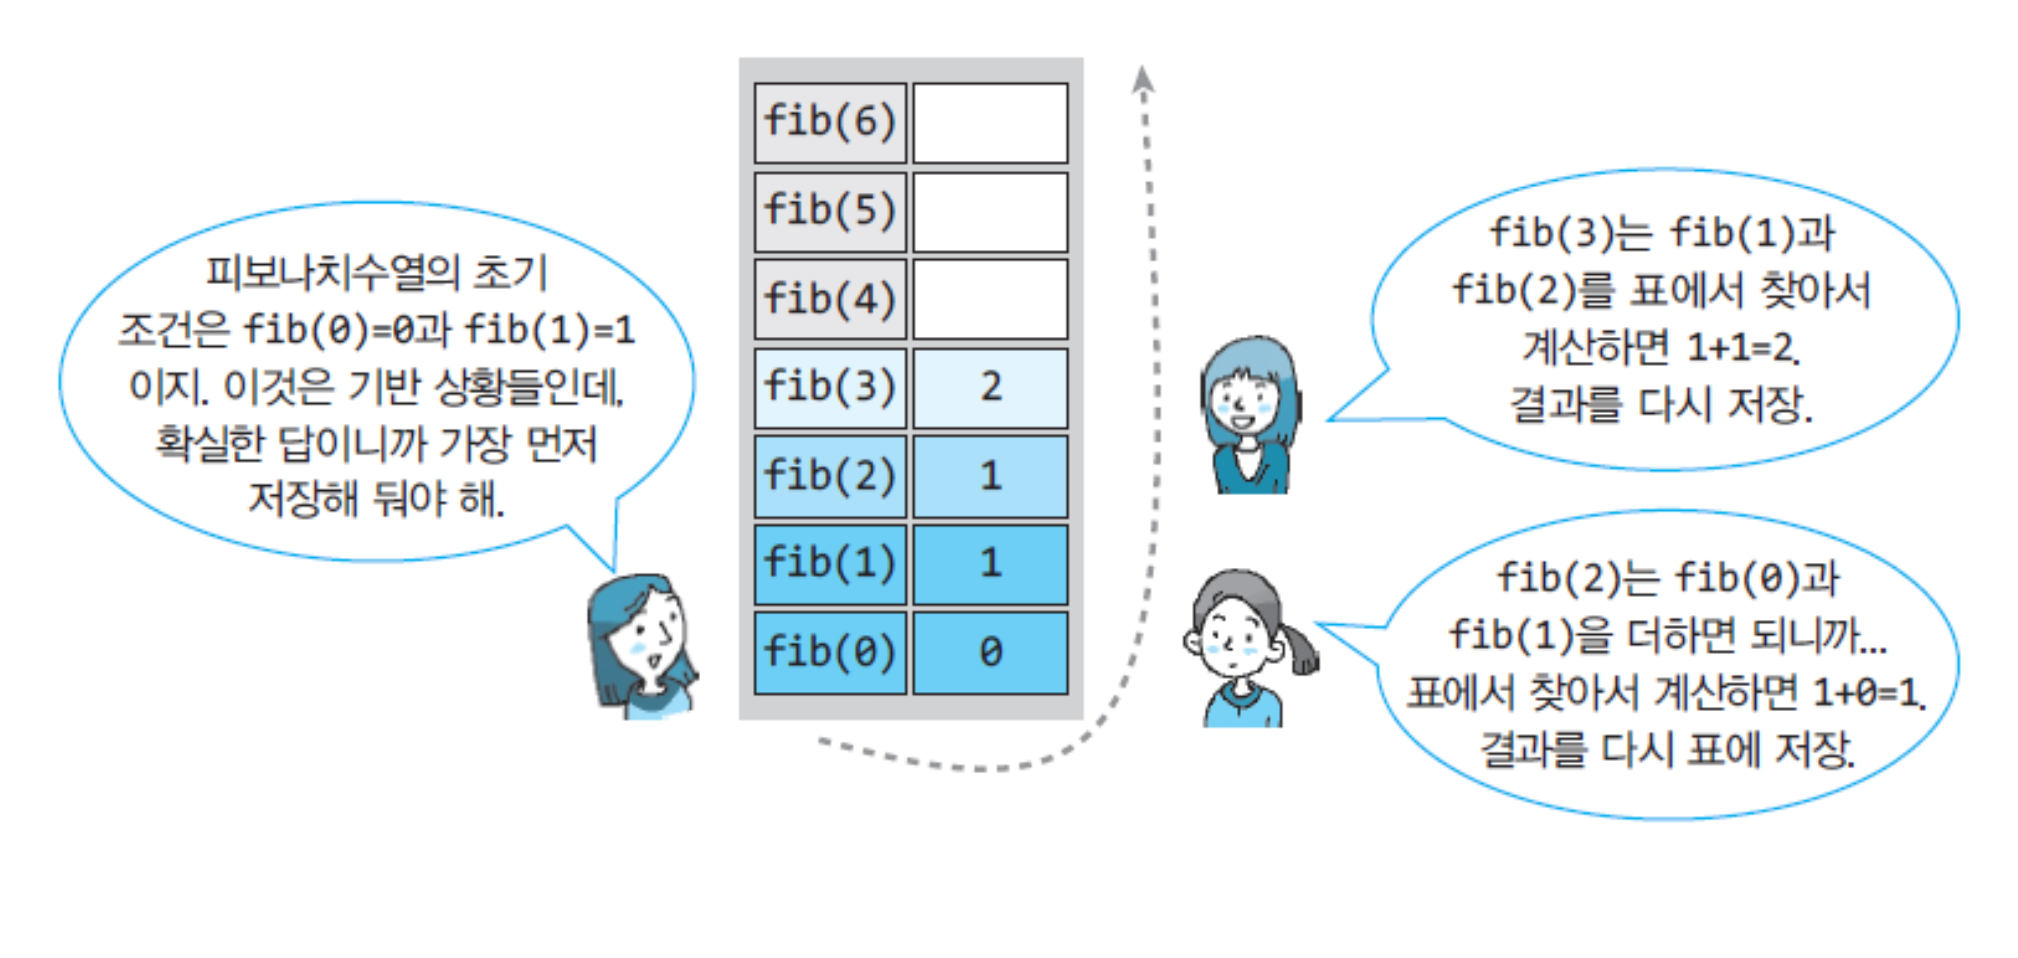

In [ ]:
def fib_dp_mem(n) :

    if( mem[n] == None ) :      # 풀리지 않은 경우-> 계산하고 저장

        if n < 2 :

            mem[n] = n      # 기반 상황: n<=1

        else:       # 일반 상황: otherwise

            mem[n] = fib_dp_mem(n-1) + fib_dp_mem(n-2)

    return mem[n]

 

 

def fib_dp_tab(n) :

    f = [None] * (n+1)     # 테이블을 만들고

    f[0] = 0             # 기반 상황 처리

    f[1] = 1             # 기반 상황 처리

    for i in range(2, n + 1):    # 상향식으로: 2, 3, ... n

        f[i] = f[i-1] + f[i-2]   # 부분 문제들을 해결하고 저장함

    return f[n]     # 결과 반환

 

 

 

n = 8

print('동적계획(  테이블화  ): Fibonacci(%d) = '%n, fib_dp_tab(n))

mem = [None] * (n+1)

print('동적계획(메모이제이션): Fibonacci(%d) = '%n, fib_dp_mem(n))

### 테이블화를 이용한 피보나치 수열 알고리즘은 O(n), 분할 정복 O(2^n)보다 월등
### 단점 추가적인 메모리 O(n)

## 패러다임
### 적용 X, 동적 계획법을 적용하려면 다음 2가지 특성 존재
### 순환 호출

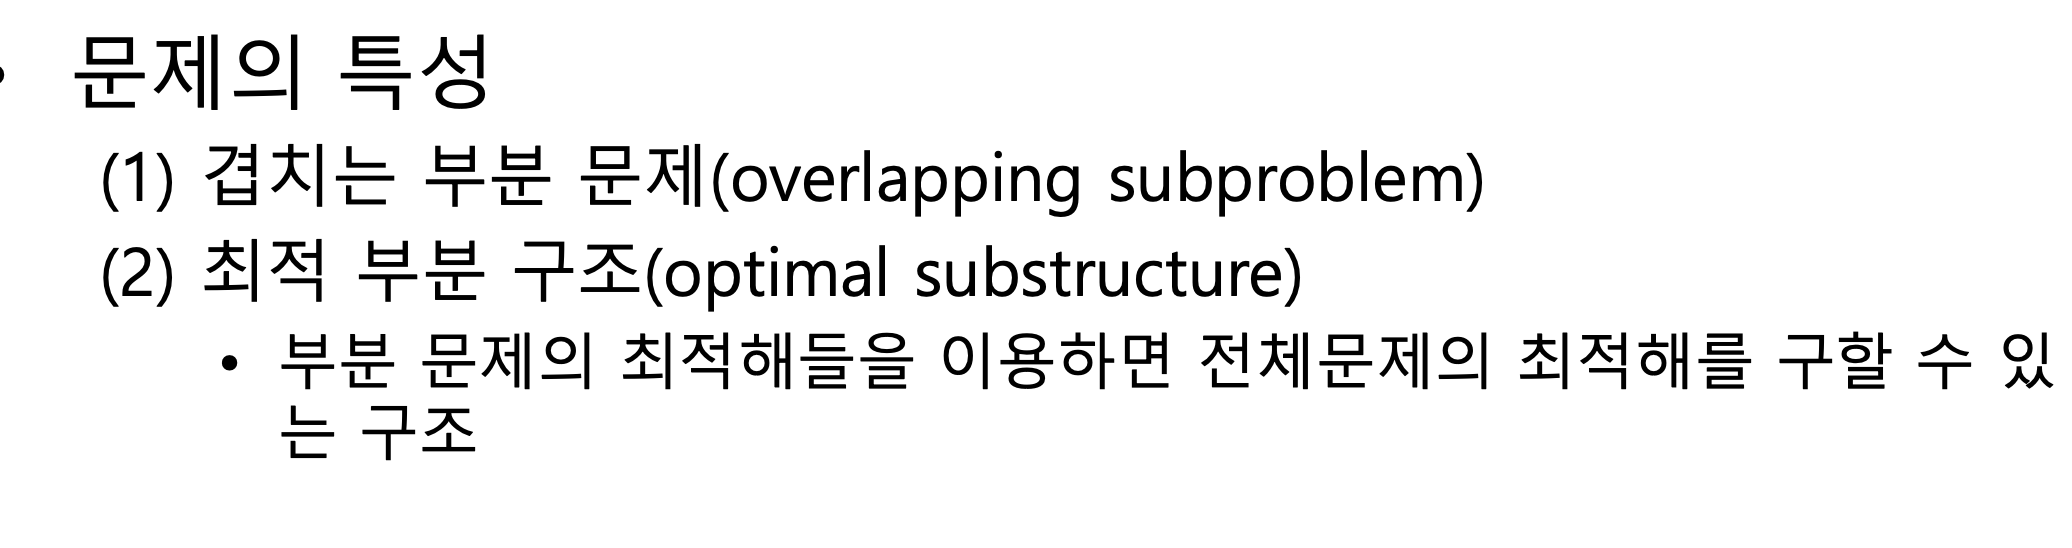

## 최적 부분 구조
- 부분 문제의 최적해들을 이용하면 전체문제의 최적해를 구할 수 있는 구조 (fib(4) , fib(5) -> (fib(6))
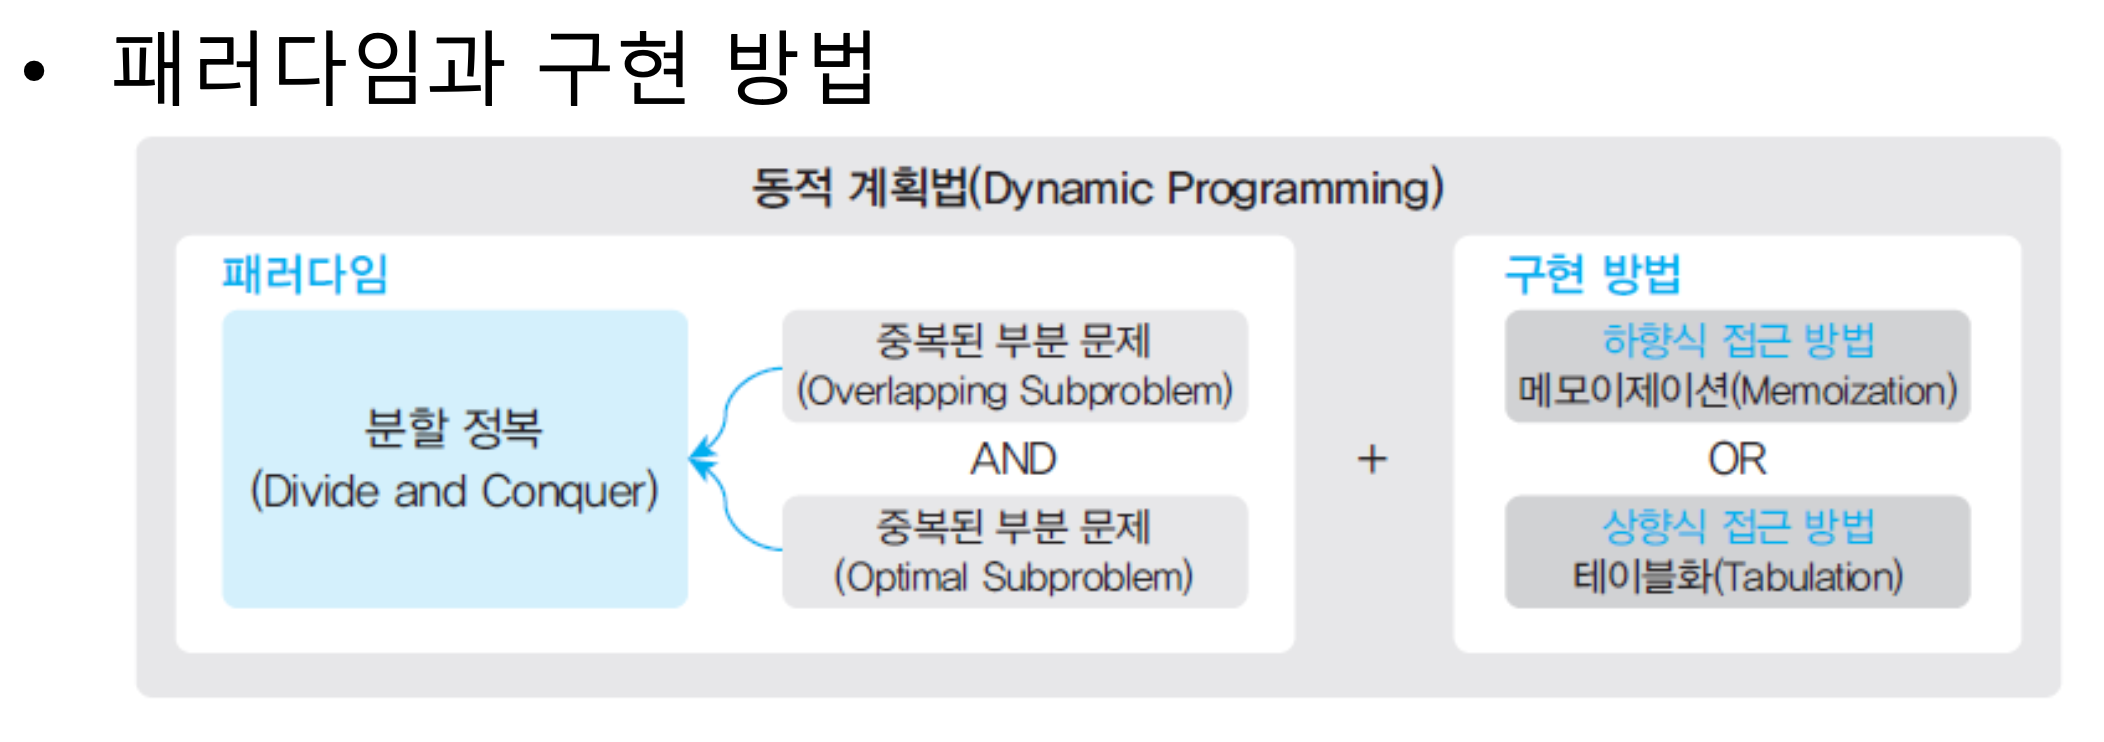

## 이항계수 구하기
### 파스칼 정리와 파스칼의 삼각형
### 이항 정리: 이항식의 거듭제곱을 이항 계수를 계수로 단항식들의 합으로 전개하는 정리

## 이항계수  이항식을 이항 정리롤 전개했을때 각 항의 계수이며 ,주어진 크기
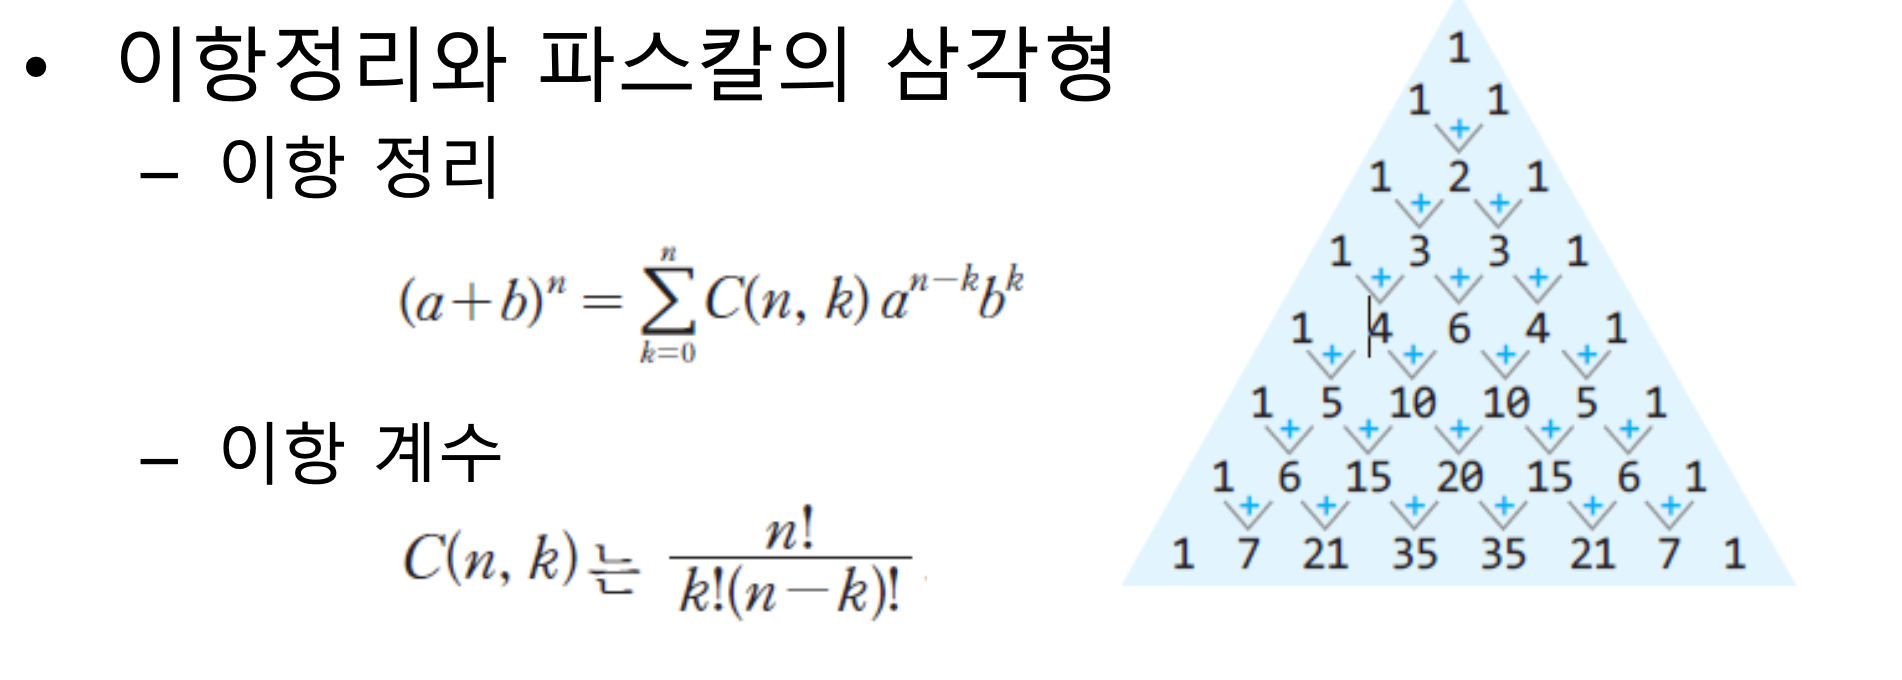
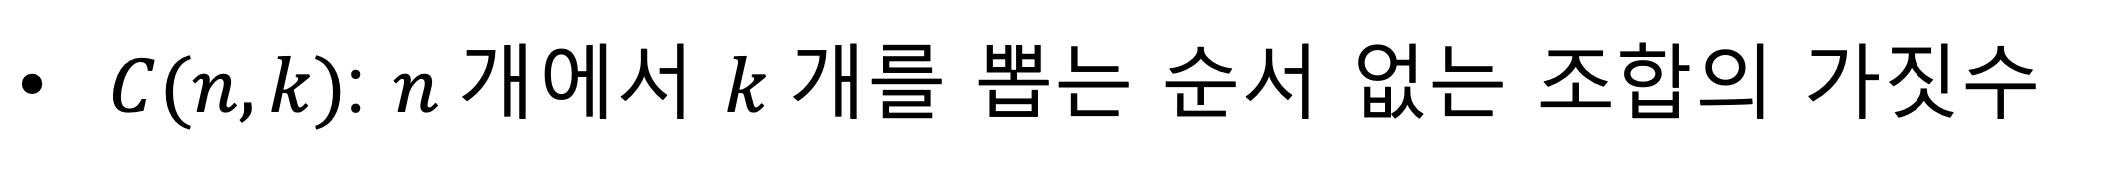

로또 추첨 45개중 순서 X 6개 45 c 6  
45*44 ... = 8,145,060

### 7.3 배낭 채우기 문제 : 0-1 Kn
억지기법

n개의 물건 : E_1, E_2..., E_n  
E_i=(wt_i,val_i): 무게 wt와 가치 val  
A(n,W): 배낭의 최대 가치  


### 무게의 단위를 모두 정수로 해야 된다.
### 테이블 설계 : (n+1)*(w+1)
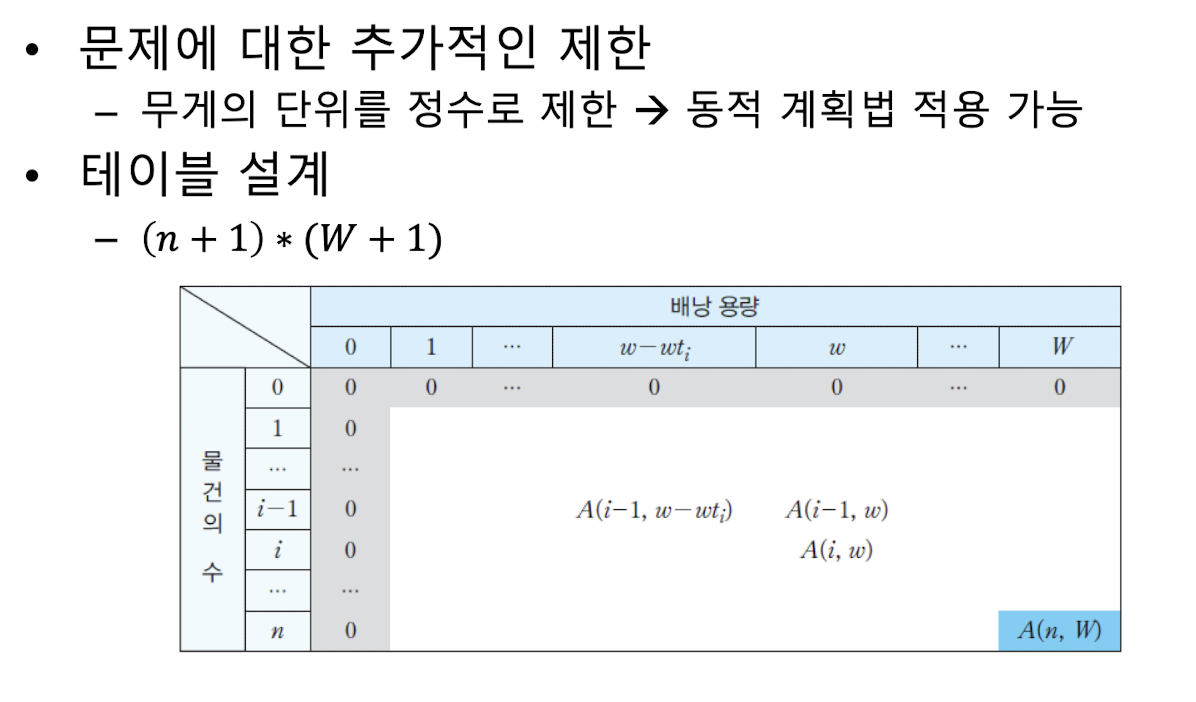
### 기반상황 : 베낭에 넣을 물건이 없거나 (k=0) 배낭용랑이 0(w=0) 가치는 => 회색셀
### 일반적 상황  : 위에서 아래, 좌에서 우로 스캔하면서 계산, 최종 오른쪽 아래셀에서 저장

In [1]:
def knapSack_dc(W, wt, val, n): 

    if n == 0 or W == 0 :       # 기반 상황

        return 0

  

    if (wt[n-1] > W):            # 넣을 수 없음

        return knapSack_dc(W, wt, val, n-1)# 나머지 항목들로 처리

    else: 

        valWithout = knapSack_dc(W, wt, val, n-1)

        valWith = val[n-1] + knapSack_dc(W-wt[n-1], wt, val, n-1)

        return max(valWith, valWithout)       # 둘 중에서 더 큰 값

 

 

def knapSack_dp(W, wt, val, n): 

    A = [[0 for x in range(W + 1)] for x in range(n + 1)] 

  

    for i in range(1, n + 1):   # 외부루프가 최대 n

        for w in range(1, W + 1):   #내부루프가 W번

            if wt[i-1] > w:    # i번째 물건이 배낭 용량 초과

                A[i][w] = A[i-1][w]

            else :       # i번째 물건이 배낭 용량 이하

                valWith = val[i-1] + A[i-1][w-wt[i-1]]  # 넣는 경우

                valWithout = A[i-1][w]                  # 빼는 경우

                A[i][w] = max(valWith, valWithout)      # 더 큰 값 선택

  

    return A[n][W]                  # 최종 결과가 저장됨

 

val = [60, 100, 190, 120, 200, 150] 

wt = [2, 5, 8, 4, 7, 6] 

W = 18

n = len(val) 

print("0-1배낭문제(분할 정복): ", knapSack_dc(W, wt, val, n)) 

print("0-1배낭문제(동적 계획): ", knapSack_dp(W, wt, val, n)) 

0-1배낭문제(분할 정복):  480
0-1배낭문제(동적 계획):  480


### 시간복잡도: O(nW)
### 공간복잡도: O(nW): 물건종류 많다면 추가공간, 만약 무게가 실수이면 => 테이블의 크기가 거의 무한대

### 최대 공통 부분 순서 문제
###  Longest Common Subsequence LCS
- 데이터의 유사도를 평가
- 유전자 염기서열 두 소프 파일의 차이 등
### 공통 "E","","O","R" LCS는 이들로 이루어지고 길이는 4
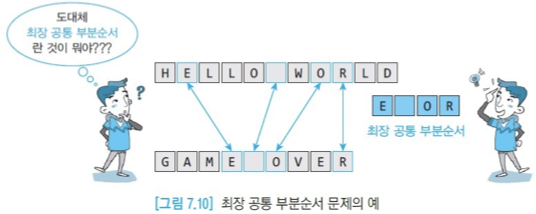

LCS의 길이: 𝑙𝑙𝑐𝑠(𝑋𝑚, 𝑌𝑛)
–	𝑋 =< 𝑥1, 𝑥2, …, 𝑥𝑚 >, 𝑌 =< 𝑦1, 𝑦2, …, 𝑦𝑛 >
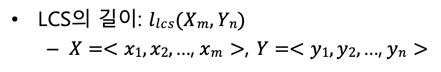


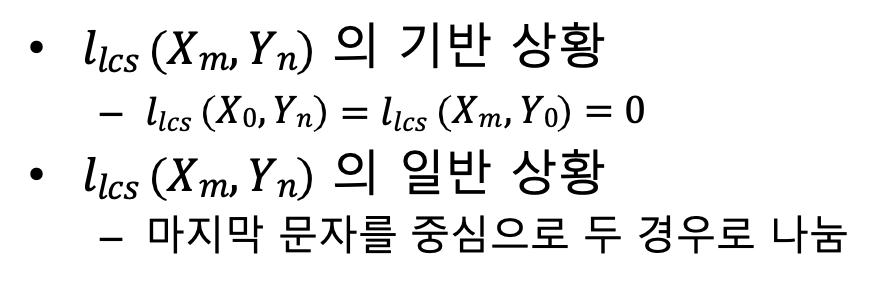

### 마지막 문자를 중심으로 두 경우로 나눔 -> 마지막 문자 빼고 LCS 길이 구한후 +1
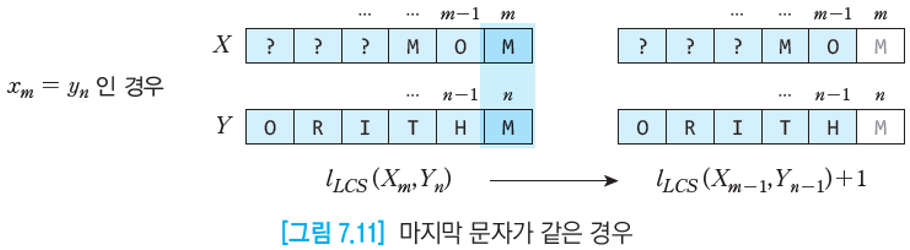

### 두 문자열 마지막 문자가 다른 경우 ->
### x에서 마지막 문자를 뺀 문자열과 Y 사이의 LCS를 구하고, Y에서 한 문자 뺀 후 X와의 LSC계산
### 이들중 더 긴 값



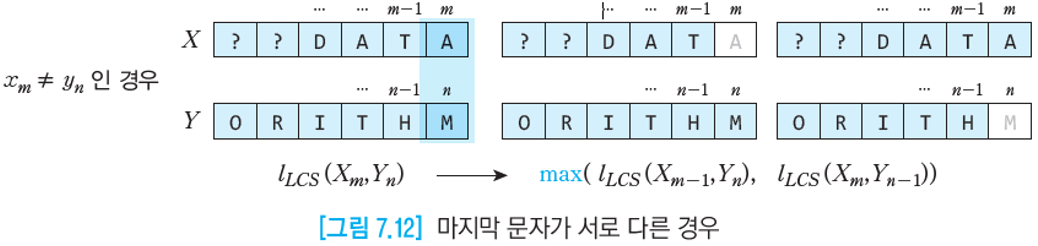


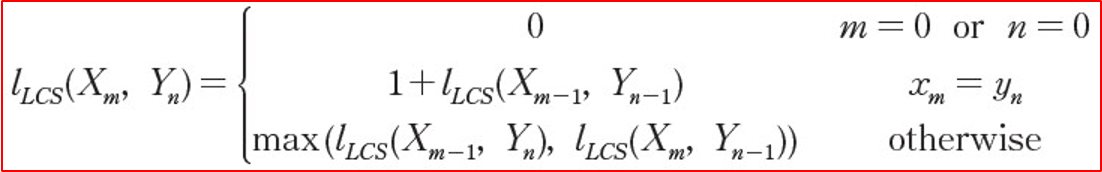

### 순환 알고리즘
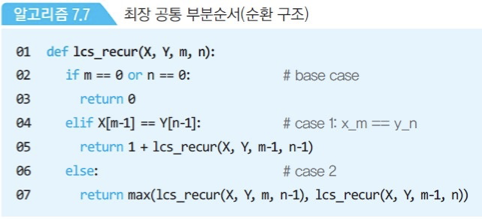

### 동적계획번에 의한 LCS 길이
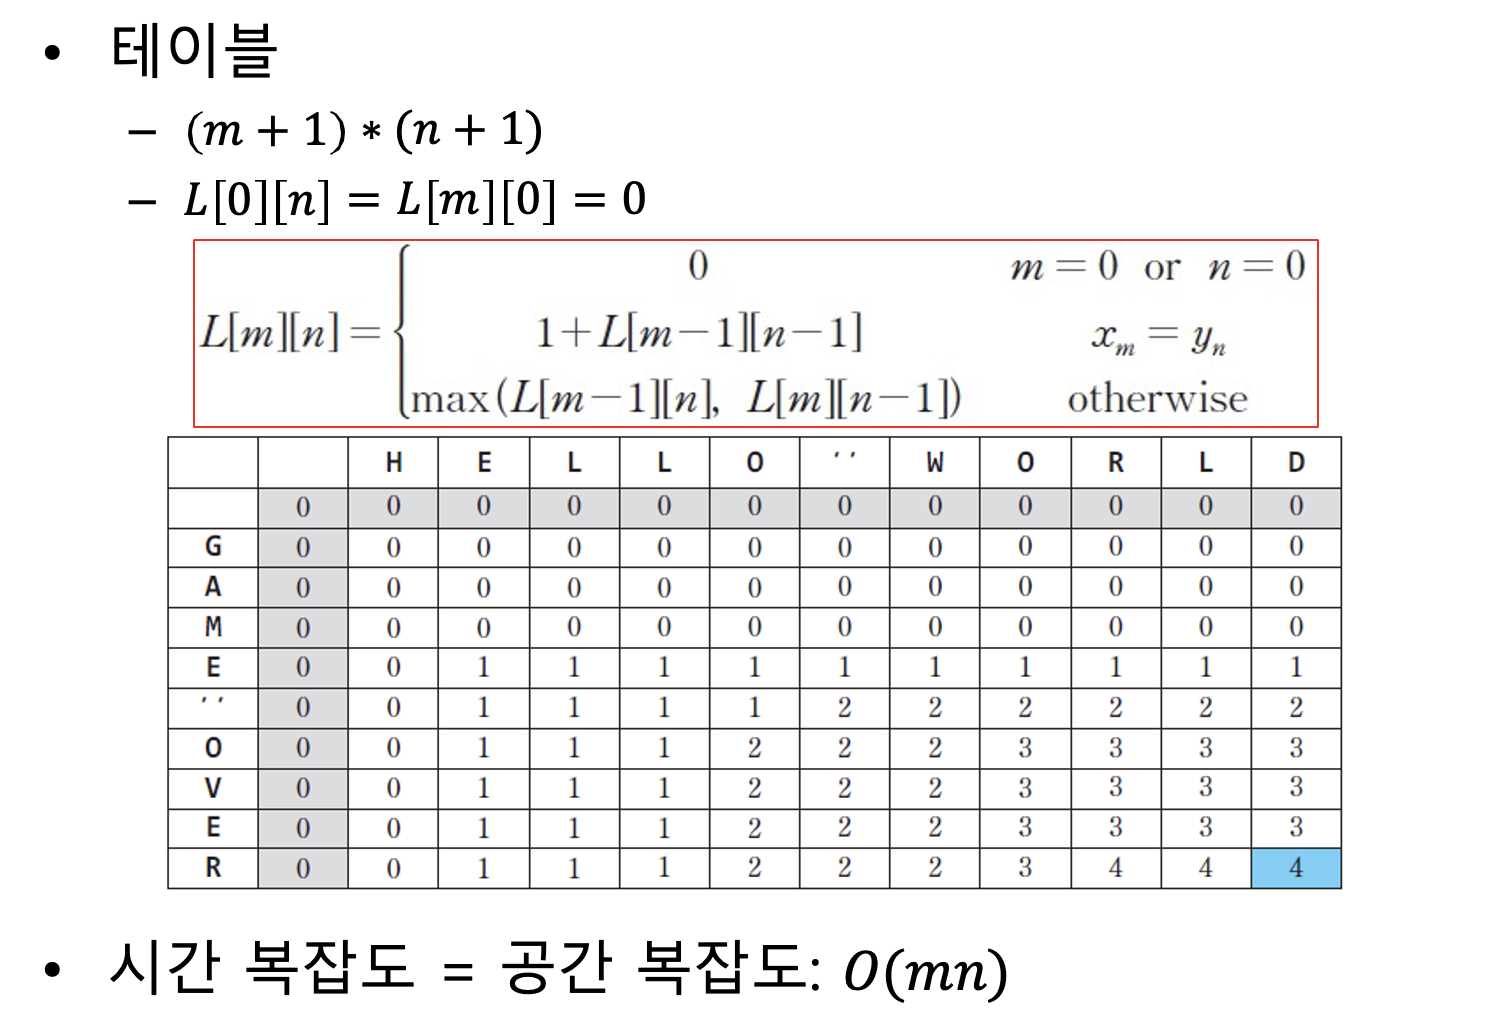
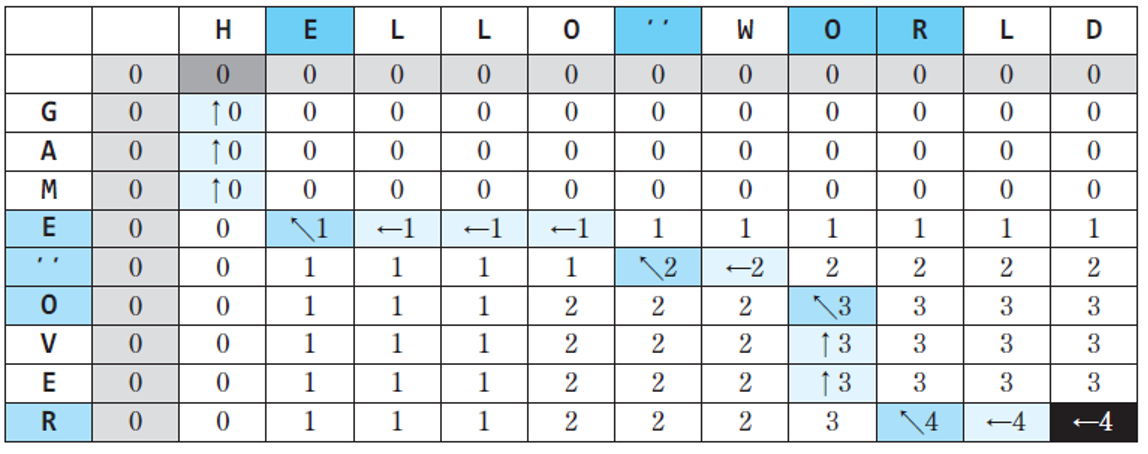

In [2]:
def lcs_dc(X, Y, m, n): 

    if m == 0 or n == 0:    # base case 

        return 0 

    elif X[m-1] == Y[n-1]:   # case 1: x_m == y_n

        return 1 + lcs_dc(X, Y, m-1, n-1) 

    else:                     # case 2

        return max(lcs_dc(X, Y, m, n-1), lcs_dc(X, Y, m-1, n)) 

 

 

def lcs_dp(X , Y): 

    m = len(X) 

    n = len(Y) 

    L = [[None]*(n+1) for _ in range(m+1)] # 테이블 생성

  

    for i in range(m+1): 

        for j in range(n+1): 

            if i == 0 or j == 0 :    # base case: 하나의 길이라도 0이면

                L[i][j] = 0    # LCS --> 0

            elif X[i-1] == Y[j-1]:   # 마지막 글자가 같으면

                L[i][j] = L[i-1][j-1]+1

            else:     # 마지막 글자가 다르면

                L[i][j] = max(L[i-1][j], L[i][j-1])

 

    for i in range(m+1):

        print(L[i])

    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 

    print("LCS = ", lcs_dp_traceback(X, Y, L))

 

    return L[m][n] 

 

 

def lcs_dp_traceback(X, Y, L):

    lcs = ""                       # ①

    i = len(X)                   # ②

    j = len(Y)                 # ② 

    while i > 0 and j > 0:

        v = L[i][j] 

        if v > L[i][j-1] and v > L[i-1][j]  and v > L[i-1][j-1]:   # ③

            i -= 1

            j -= 1

            lcs = X[i] + lcs

 

        elif v == L[i][j-1] and v > L[i-1][j]: j -= 1   # ④

        else : i -= 1    # ⑤

    return lcs

 

 

X = "GAME OVER"

Y = "HELLO WORLD"

print("X = ", X)

print("Y = ", Y)

print("LCS(분할 정복)", lcs_dc(X , Y, len(X), len(Y)))

print("LCS(동적 계획)", lcs_dp(X , Y) )

X =  GAME OVER
Y =  HELLO WORLD
LCS(분할 정복) 4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4]
LCS =  E OR
LCS(동적 계획) 4
